## Soft Voting Classifier

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

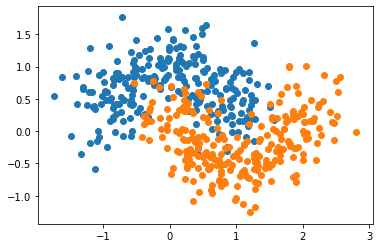

In [19]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 使用 Hard Voting Classifier

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()), 
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier(random_state=666))],
                             voting='hard')

In [22]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.904

### 使用 Soft Voting Classifier

In [23]:
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()), 
    # 为了支持soft voting，所以svc实例化时需要传入probability=True
    ('svm_clf', SVC(probability=True)),
    ('dt_clf', DecisionTreeClassifier(random_state=666))],
                             voting='soft')

In [24]:
voting_clf2.fit(X_train, y_train)
voting_clf2.score(X_test, y_test)

0.904